# Boston Public Schools

### Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate
# %pip install folium

### Imports

In [34]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import Point

import folium

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx

import mapclassify

### Display Imports & Their Versions

In [35]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__],
    ['Map Classify', mapclassify.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+
| Map Classify       | 2.8.1     |
+--------------------+-----------+


### Import Dataset

In [37]:
gdf = geopandas.read_file("data/Public_Schools.geojson")

gdf

,OBJECTID_1,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,SCH_ID,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,Label,TLT,PL,POINT_X,POINT_Y,geometry
0,1,1,1,Guild Bldg,195 Leyden Street,East Boston,02128,4061,4061,Guild Elementary,Guild,ES,,,52,3,Grace,790128.152748,2.967094e+06,POINT (-71.00412 42.3888)
1,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,02128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,,,72,3,Grace,783027.745829,2.963318e+06,POINT (-71.03048 42.37855)
2,3,3,4,Otis Bldg,218 Marion Street,East Boston,02128,4322,4322,Otis Elementary,Otis,ES,,,106,3,Grace,782112.823908,2.962122e+06,POINT (-71.03389 42.37528)
3,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,02128,4543,4543,O'Donnell Elementary,O'Donnell,ES,,,103,3,Grace,780994.000003,2.963140e+06,POINT (-71.03801 42.37809)
4,5,5,7,East Boston High Bldg,86 White Street,East Boston,02128,1070,1070,East Boston High,East Boston HS,HS,,,36,2,Joel,781823.000004,2.964190e+06,POINT (-71.03492 42.38096)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,1736,52,Higginson Bldg,160 Harrishof Street,Roxbury,02119,4241,4241,Higginson Elementary (K1-2),Higginson (K1-2),ES,,,61,1,Marice,766503.829431,2.941044e+06,POINT (-71.09203 42.31766)
127,128,2136,0,Alighieri Bldg,37 Gove St.,East Boston,02128,4321,4321,Alighieri Montessori,Alighieri,ES,,,2,1,Marice,781025.956811,2.960764e+06,POINT (-71.03794 42.37157)
128,129,2938,0,Church Street Bldg,20 Church Street,Boston,02116,1215,1215,Boston Adult Tech Acad,BATA,Special,,,8,4,Freddie,772904.812815,2.952413e+06,POINT (-71.06815 42.34877)
129,130,2946,139,Taft Bldg,20 Warren Street,Brighton,02135,1470,1470,Boston Green Academy,Boston Green Academy,6/7-12,,,11,4,Jonathan,751868.385102,2.952925e+06,POINT (-71.14596 42.35044)


### Retrieve Descriptive Statistics About Dataset

In [38]:
gdf.describe(include='all')

,OBJECTID_1,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,SCH_ID,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,Label,TLT,PL,POINT_X,POINT_Y,geometry
count,131.000000,131.000000,131.000000,131,131,131,131,131.000000,131.000000,131,131,131,131,131,131.000000,131.000000,131,131.000000,1.310000e+02,131
unique,NaN,NaN,NaN,122,123,13,22,NaN,NaN,130,130,8,2,3,NaN,NaN,11,NaN,NaN,127
top,NaN,NaN,NaN,Cleveland Bldg,11 Charles Street,Dorchester,02119,NaN,NaN,Eliot K-8,Eliot K-8,ES,,,NaN,NaN,Grace,NaN,NaN,POINT (-71.07352059401761 42.34436866956001)
freq,NaN,NaN,NaN,2,2,27,14,NaN,NaN,2,2,42,115,129,NaN,NaN,17,NaN,NaN,2
mean,66.000000,174.091603,93.954198,NaN,NaN,NaN,NaN,3340.526718,3340.526718,NaN,NaN,NaN,NaN,NaN,67.045802,2.465649,NaN,766998.707127,2.941474e+06,NaN
std,37.960506,516.188255,122.093713,NaN,NaN,NaN,NaN,1411.920690,1411.920690,NaN,NaN,NaN,NaN,NaN,38.640525,1.069131,NaN,9940.122332,1.270433e+04,NaN
min,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1010.000000,1010.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,744291.893473,2.910470e+06,NaN
25%,33.500000,36.500000,40.500000,NaN,NaN,NaN,NaN,1445.500000,1445.500000,NaN,NaN,NaN,NaN,NaN,34.500000,2.000000,NaN,760474.851289,2.931021e+06,NaN
50%,66.000000,71.000000,82.000000,NaN,NaN,NaN,NaN,4160.000000,4160.000000,NaN,NaN,NaN,NaN,NaN,67.000000,2.000000,NaN,768044.999991,2.941327e+06,NaN
75%,98.500000,104.500000,122.500000,NaN,NaN,NaN,NaN,4360.500000,4360.500000,NaN,NaN,NaN,NaN,NaN,100.500000,3.000000,NaN,773817.420636,2.950615e+06,NaN


### Print Unique Values & Unique Value Counts For Each Feature

In [39]:
unique_cols_to_check = [
    "OBJECTID_1",
    "OBJECTID",
    "BLDG_ID",
    "CITY",
    "ZIPCODE",
    "CSP_SCH_ID",
    "SCH_ID",
    "SCH_TYPE",
    "SHARED",
    "COMPLEX",
    "TLT",
    "PL"
]

for col in unique_cols_to_check:
    u_val = gdf[col].unique()
    print(f"{col} ({len(u_val)})\n{u_val}")
    print()

OBJECTID_1 (131)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131]

OBJECTID (131)
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   27   28   29
   30   32   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   52   53   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   69   70   71   72   74   75   76
   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   

### Remove Unnecessary Columns

In [40]:
cols_to_drop = [
    'COMPLEX',
    'POINT_X',
    'POINT_Y',
    'OBJECTID_1',
    'CSP_SCH_ID',
    'OBJECTID'
]

gdf.drop(columns=cols_to_drop, inplace=True)

### Rename Columns As Needed

In [41]:
cols_to_rename = {
    'SCH_ID': 'school_id',
    'SCH_TYPE': 'school_type',
    'SHARED': 'shared',
    'BLDG_ID': 'building_id',
    'OBJECTID': 'object_id',
    'BLDG_NAME': 'building_name',
    'ADDRESS': 'address',
    'CITY': 'city',
    'ZIPCODE': 'zip_code',
    'SCH_NAME': 'school_name',
    'SCH_LABEL': 'school_label',
    'SCH_TYPE': 'school_type',
    'Label': 'label',
    'TLT': 'tlt',
    'PL': 'pl'
}

gdf.rename(columns=cols_to_rename, inplace=True)

### Fill in Missing Values in 'Shared' Feature

In [42]:
gdf['shared'].replace(to_replace=' ', value='Not Shared', inplace=True)

gdf

,building_id,building_name,address,city,zip_code,school_id,school_name,school_label,school_type,shared,label,tlt,pl,geometry
0,1,Guild Bldg,195 Leyden Street,East Boston,02128,4061,Guild Elementary,Guild,ES,Not Shared,52,3,Grace,POINT (-71.00412 42.3888)
1,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,02128,4541,Kennedy Patrick Elem,PJ Kennedy,ES,Not Shared,72,3,Grace,POINT (-71.03048 42.37855)
2,4,Otis Bldg,218 Marion Street,East Boston,02128,4322,Otis Elementary,Otis,ES,Not Shared,106,3,Grace,POINT (-71.03389 42.37528)
3,6,Odonnell Bldg,33 Trenton Street,East Boston,02128,4543,O'Donnell Elementary,O'Donnell,ES,Not Shared,103,3,Grace,POINT (-71.03801 42.37809)
4,7,East Boston High Bldg,86 White Street,East Boston,02128,1070,East Boston High,East Boston HS,HS,Not Shared,36,2,Joel,POINT (-71.03492 42.38096)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,52,Higginson Bldg,160 Harrishof Street,Roxbury,02119,4241,Higginson Elementary (K1-2),Higginson (K1-2),ES,Not Shared,61,1,Marice,POINT (-71.09203 42.31766)
127,0,Alighieri Bldg,37 Gove St.,East Boston,02128,4321,Alighieri Montessori,Alighieri,ES,Not Shared,2,1,Marice,POINT (-71.03794 42.37157)
128,0,Church Street Bldg,20 Church Street,Boston,02116,1215,Boston Adult Tech Acad,BATA,Special,Not Shared,8,4,Freddie,POINT (-71.06815 42.34877)
129,139,Taft Bldg,20 Warren Street,Brighton,02135,1470,Boston Green Academy,Boston Green Academy,6/7-12,Not Shared,11,4,Jonathan,POINT (-71.14596 42.35044)


In [43]:
gdf.describe(include='all')

,building_id,building_name,address,city,zip_code,school_id,school_name,school_label,school_type,shared,label,tlt,pl,geometry
count,131.000000,131,131,131,131,131.000000,131,131,131,131,131.000000,131.000000,131,131
unique,NaN,122,123,13,22,NaN,130,130,8,2,NaN,NaN,11,127
top,NaN,Cleveland Bldg,11 Charles Street,Dorchester,02119,NaN,Eliot K-8,Eliot K-8,ES,Not Shared,NaN,NaN,Grace,POINT (-71.07352059401761 42.34436866956001)
freq,NaN,2,2,27,14,NaN,2,2,42,115,NaN,NaN,17,2
mean,93.954198,NaN,NaN,NaN,NaN,3340.526718,NaN,NaN,NaN,NaN,67.045802,2.465649,NaN,NaN
std,122.093713,NaN,NaN,NaN,NaN,1411.920690,NaN,NaN,NaN,NaN,38.640525,1.069131,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1010.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,40.500000,NaN,NaN,NaN,NaN,1445.500000,NaN,NaN,NaN,NaN,34.500000,2.000000,NaN,NaN
50%,82.000000,NaN,NaN,NaN,NaN,4160.000000,NaN,NaN,NaN,NaN,67.000000,2.000000,NaN,NaN
75%,122.500000,NaN,NaN,NaN,NaN,4360.500000,NaN,NaN,NaN,NaN,100.500000,3.000000,NaN,NaN


## Data Visualization of Points

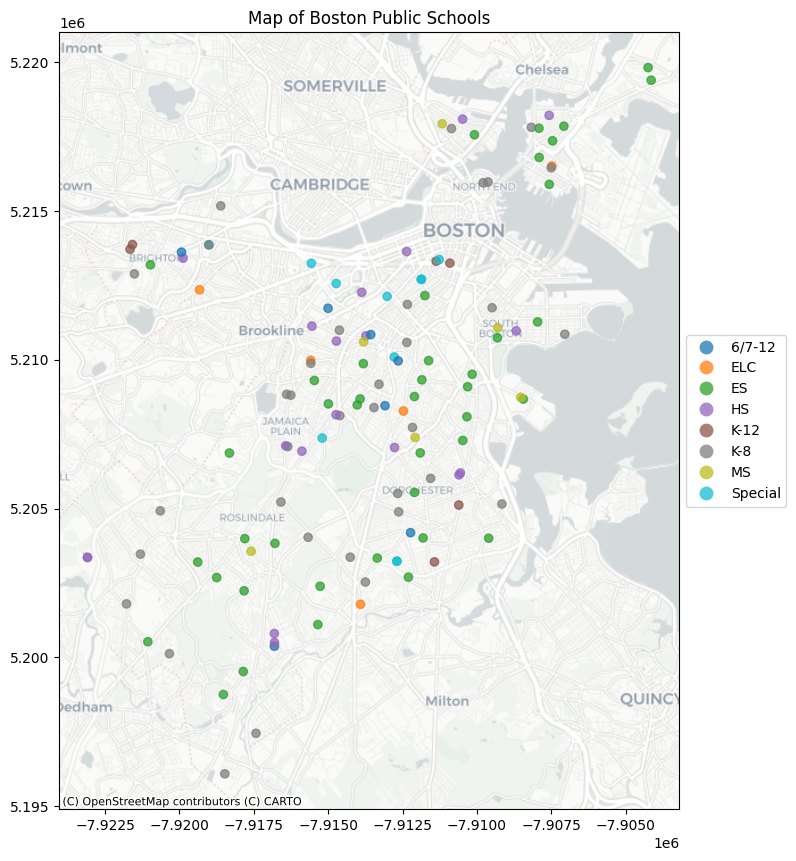

In [44]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 24))
gdf_plot.plot(
    column='school_type', 
    ax=ax, 
    alpha=0.75, 
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)}
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Boston Public Schools")

plt.show()

## Interactive Visualization

In [45]:
gdf.explore(
    m = folium.Map(
        location=[42.30, -71.10], 
        tiles="OpenStreetMap", # "CartoDB Voyager", OpenStreetMap
        zoom_start=11,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'red',
        'weight': 5,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.20
    },
    highlight_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 8,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.75
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            'Building ID',
            'Building Name',
            'Building Address',
            'Building City',
            'Building Zipcode',
            'School ID',
            'School Name',
            'School Label',
            'School Type',
            'Shared',
            'Label',
            'TLT',
            'Principal/Leader'
        ]
    }
)

## Time For Fun with Functions

### Dissolve by School Type

In [46]:
gdf.dissolve(by='school_type', sort=True)

,geometry,building_id,building_name,address,city,zip_code,school_id,school_name,school_label,shared,label,tlt,pl
school_type,,,,,,,,,,,,,
6/7-12,"MULTIPOINT (-71.14596 42.35044, -71.11791 42.2...",48,Madison Park Bldg #3 - O'Bryant,55 Malcolm X Blvd,Roxbury,02120,1030,O'Bryant Math & Sci.,O'Bryant School,Not Shared,102,4,Anthony
ELC,"MULTIPOINT (-71.14051 42.34204, -71.10694 42.3...",10,East Boston Eec Bldg,135 Gove Street,East Boston,02128,4450,East Boston EEC,East Boston EEC,Not Shared,35,1,Marice
ES,"MULTIPOINT (-71.15613 42.26344, -71.15535 42.3...",1,Guild Bldg,195 Leyden Street,East Boston,02128,4061,Guild Elementary,Guild,Not Shared,52,3,Grace
HS,"MULTIPOINT (-71.17434 42.28227, -71.14549 42.3...",7,East Boston High Bldg,86 White Street,East Boston,02128,1070,East Boston High,East Boston HS,Not Shared,36,2,Joel
K-12,"MULTIPOINT (-71.1615 42.35108, -71.16076 42.35...",21,Abraham Lincoln Building,152 Arlington Street,Boston,02116,1450,Quincy Upper School,Quincy Upper (6-12),Not Shared,112,4,Jonathan
K-8,"MULTIPOINT (-71.16257 42.27189, -71.16019 42.3...",8,Umana / Barnes Bldg,312 Border Street,East Boston,02128,4323,Umana Academy,Umana Academy,Not Shared,124,3,Grace
MS,"MULTIPOINT (-71.12493 42.28364, -71.09097 42.3...",15,Edwards Bldg,28 Walker Street,Charlestown,02129,2010,Edwards Middle,Edwards MS,Not Shared,38,3,Grace
Special,"MULTIPOINT (-71.1377 42.35206, -71.10676 42.34...",26,Mckinley Mackey Bldg,90 Warren Avenue,Boston,02116,1291,McKinley Elementary,McKinley Elem,Shared,90,3,Grace


### Dissolve by Principal/Leader

In [47]:
gdf.dissolve(by='pl', sort=True, aggfunc='mean', numeric_only=True)

,geometry,building_id,school_id,label,tlt
pl,,,,,
Alex,"MULTIPOINT (-71.16019 42.34559, -71.15535 42.3...",123.866667,4109.333333,64.066667,3.0
Anthony,"MULTIPOINT (-71.11793 42.26526, -71.11791 42.2...",89.090909,1351.272727,59.272727,4.0
Christine,"MULTIPOINT (-71.07541 42.30905, -71.07386 42.3...",74.785714,3706.571429,76.785714,1.0
Freddie,"MULTIPOINT (-71.10349 42.30893, -71.09929 42.3...",63.750000,1348.750000,23.000000,4.0
Grace,"MULTIPOINT (-71.10676 42.34795, -71.09926 42.3...",25.411765,3506.235294,74.529412,3.0
Joel,"MULTIPOINT (-71.17434 42.28227, -71.15837 42.2...",163.428571,3556.571429,82.000000,2.0
Jonathan,"MULTIPOINT (-71.1615 42.35108, -71.16076 42.35...",102.846154,1467.000000,50.384615,4.0
Kelly,"MULTIPOINT (-71.11594 42.29464, -71.095 42.282...",77.266667,4071.000000,85.533333,2.0
Ligia,POINT (-71.09029 42.33176),47.000000,1210.000000,82.000000,4.0


### Append Column With Geometry Type for Each Record

In [48]:
print("Geometry Type")

gdf_gt = gdf[['building_name', 'address', 'city', 'zip_code', 'school_id', 'school_name', 'school_label', 'school_type', 'shared', 'label', 'tlt', 'pl']].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,building_name,address,city,zip_code,school_id,school_name,school_label,school_type,shared,label,tlt,pl,geometry_type
0,Guild Bldg,195 Leyden Street,East Boston,02128,4061,Guild Elementary,Guild,ES,Not Shared,52,3,Grace,Point
1,"Kennedy, P Bldg",343 Saratoga Street,East Boston,02128,4541,Kennedy Patrick Elem,PJ Kennedy,ES,Not Shared,72,3,Grace,Point
2,Otis Bldg,218 Marion Street,East Boston,02128,4322,Otis Elementary,Otis,ES,Not Shared,106,3,Grace,Point
3,Odonnell Bldg,33 Trenton Street,East Boston,02128,4543,O'Donnell Elementary,O'Donnell,ES,Not Shared,103,3,Grace,Point
4,East Boston High Bldg,86 White Street,East Boston,02128,1070,East Boston High,East Boston HS,HS,Not Shared,36,2,Joel,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Higginson Bldg,160 Harrishof Street,Roxbury,02119,4241,Higginson Elementary (K1-2),Higginson (K1-2),ES,Not Shared,61,1,Marice,Point
127,Alighieri Bldg,37 Gove St.,East Boston,02128,4321,Alighieri Montessori,Alighieri,ES,Not Shared,2,1,Marice,Point
128,Church Street Bldg,20 Church Street,Boston,02116,1215,Boston Adult Tech Acad,BATA,Special,Not Shared,8,4,Freddie,Point
129,Taft Bldg,20 Warren Street,Brighton,02135,1470,Boston Green Academy,Boston Green Academy,6/7-12,Not Shared,11,4,Jonathan,Point


### Determine Point's Distance From Harvard

In [49]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [50]:
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point)

gdf_projected

,building_id,building_name,address,city,zip_code,school_id,school_name,school_label,school_type,shared,label,tlt,pl,geometry,dist_from_harvard,hausdorff_dist_from_harvard,frechet_dist_from_harvard
0,1,Guild Bldg,195 Leyden Street,East Boston,02128,4061,Guild Elementary,Guild,ES,Not Shared,52,3,Grace,POINT (335034.564 4694891.01),4.706793e+06,4.706793e+06,4.706793e+06
1,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,02128,4541,Kennedy Patrick Elem,PJ Kennedy,ES,Not Shared,72,3,Grace,POINT (332837.519 4693803.971),4.705553e+06,4.705553e+06,4.705553e+06
2,4,Otis Bldg,218 Marion Street,East Boston,02128,4322,Otis Elementary,Otis,ES,Not Shared,106,3,Grace,POINT (332548.068 4693447.952),4.705177e+06,4.705177e+06,4.705177e+06
3,6,Odonnell Bldg,33 Trenton Street,East Boston,02128,4543,O'Donnell Elementary,O'Donnell,ES,Not Shared,103,3,Grace,POINT (332216.324 4693768.103),4.705473e+06,4.705473e+06,4.705473e+06
4,7,East Boston High Bldg,86 White Street,East Boston,02128,1070,East Boston High,East Boston HS,HS,Not Shared,36,2,Joel,POINT (332478.296 4694080.571),4.705803e+06,4.705803e+06,4.705803e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,52,Higginson Bldg,160 Harrishof Street,Roxbury,02119,4241,Higginson Elementary (K1-2),Higginson (K1-2),ES,Not Shared,61,1,Marice,POINT (327603.806 4687166.06),4.698564e+06,4.698564e+06,4.698564e+06
127,0,Alighieri Bldg,37 Gove St.,East Boston,02128,4321,Alighieri Montessori,Alighieri,ES,Not Shared,2,1,Marice,POINT (332204.776 4693043.945),4.704750e+06,4.704750e+06,4.704750e+06
128,0,Church Street Bldg,20 Church Street,Boston,02116,1215,Boston Adult Tech Acad,BATA,Special,Not Shared,8,4,Freddie,POINT (329655.76 4690572.408),4.702105e+06,4.702105e+06,4.702105e+06
129,139,Taft Bldg,20 Warren Street,Brighton,02135,1470,Boston Green Academy,Boston Green Academy,6/7-12,Not Shared,11,4,Jonathan,POINT (323251.18 4690916.813),4.702004e+06,4.702004e+06,4.702004e+06


### Retrieve Coordinates

In [51]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0   -71.004121  42.388799 NaN
1   -71.030480  42.378545 NaN
2   -71.033891  42.375279 NaN
3   -71.038011  42.378089 NaN
4   -71.034921  42.380957 NaN
..         ...        ...  ..
126 -71.092030  42.317660 NaN
127 -71.037940  42.371568 NaN
128 -71.068150  42.348770 NaN
129 -71.145961  42.350441 NaN
130 -71.080504  42.326153 NaN

[131 rows x 3 columns]

GDF Count Coordinates:
0      1
1      1
2      1
3      1
4      1
      ..
126    1
127    1
128    1
129    1
130    1
Length: 131, dtype: int32

GDF Count Geometries:
0      1
1      1
2      1
3      1
4      1
      ..
126    1
127    1
128    1
129    1
130    1
Length: 131, dtype: int32


In [52]:
gdf.count_coordinates().mean()

1.0

In [53]:
gdf.count_geometries().mean()

1.0

### Some Basic Functions

In [54]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    131
dtype: int64

is_valid:
True    131
dtype: int64

is_valid_reason:
Valid Geometry    131
dtype: int64

has_z:
False    131
dtype: int64



### Some More Functions

In [55]:
gdf.envelope

0       POINT (-71.00412 42.3888)
1      POINT (-71.03048 42.37855)
2      POINT (-71.03389 42.37528)
3      POINT (-71.03801 42.37809)
4      POINT (-71.03492 42.38096)
                  ...            
126    POINT (-71.09203 42.31766)
127    POINT (-71.03794 42.37157)
128    POINT (-71.06815 42.34877)
129    POINT (-71.14596 42.35044)
130     POINT (-71.0805 42.32615)
Length: 131, dtype: geometry

In [56]:
gdf.extract_unique_points()

0       MULTIPOINT (-71.00412 42.3888)
1      MULTIPOINT (-71.03048 42.37855)
2      MULTIPOINT (-71.03389 42.37528)
3      MULTIPOINT (-71.03801 42.37809)
4      MULTIPOINT (-71.03492 42.38096)
                    ...               
126    MULTIPOINT (-71.09203 42.31766)
127    MULTIPOINT (-71.03794 42.37157)
128    MULTIPOINT (-71.06815 42.34877)
129    MULTIPOINT (-71.14596 42.35044)
130     MULTIPOINT (-71.0805 42.32615)
Length: 131, dtype: geometry

In [57]:
gdf.force_2d()

0       POINT (-71.00412 42.3888)
1      POINT (-71.03048 42.37855)
2      POINT (-71.03389 42.37528)
3      POINT (-71.03801 42.37809)
4      POINT (-71.03492 42.38096)
                  ...            
126    POINT (-71.09203 42.31766)
127    POINT (-71.03794 42.37157)
128    POINT (-71.06815 42.34877)
129    POINT (-71.14596 42.35044)
130     POINT (-71.0805 42.32615)
Length: 131, dtype: geometry

In [58]:
gdf.minimum_bounding_circle()

0       POINT (-71.00412 42.3888)
1      POINT (-71.03048 42.37855)
2      POINT (-71.03389 42.37528)
3      POINT (-71.03801 42.37809)
4      POINT (-71.03492 42.38096)
                  ...            
126    POINT (-71.09203 42.31766)
127    POINT (-71.03794 42.37157)
128    POINT (-71.06815 42.34877)
129    POINT (-71.14596 42.35044)
130     POINT (-71.0805 42.32615)
Length: 131, dtype: geometry

In [59]:
gdf.remove_repeated_points()

0       POINT (-71.00412 42.3888)
1      POINT (-71.03048 42.37855)
2      POINT (-71.03389 42.37528)
3      POINT (-71.03801 42.37809)
4      POINT (-71.03492 42.38096)
                  ...            
126    POINT (-71.09203 42.31766)
127    POINT (-71.03794 42.37157)
128    POINT (-71.06815 42.34877)
129    POINT (-71.14596 42.35044)
130     POINT (-71.0805 42.32615)
Length: 131, dtype: geometry

### Transform Markers/Points

In [60]:
gdf['geometry'].transform(lambda x: x + [1, 2])

0       POINT (-70.00412 44.3888)
1      POINT (-70.03048 44.37855)
2      POINT (-70.03389 44.37528)
3      POINT (-70.03801 44.37809)
4      POINT (-70.03492 44.38096)
                  ...            
126    POINT (-70.09203 44.31766)
127    POINT (-70.03794 44.37157)
128    POINT (-70.06815 44.34877)
129    POINT (-70.14596 44.35044)
130     POINT (-70.0805 44.32615)
Length: 131, dtype: geometry

### Interface

In [61]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'building_id': 1,
    'building_name': 'Guild Bldg',
    'address': '195 Leyden Street',
    'city': 'East Boston',
    'zip_code': '02128',
    'school_id': 4061,
    'school_name': 'Guild Elementary',
    'school_label': 'Guild',
    'school_type': 'ES',
    'shared': 'Not Shared',
    'label': 52,
    'tlt': 3,
    'pl': 'Grace'},
   'geometry': {'type': 'Point',
    'coordinates': (-71.00412057520259, 42.38879868107347)},
   'bbox': (-71.00412057520259,
    42.38879868107347,
    -71.00412057520259,
    42.38879868107347)},
  {'id': '1',
   'type': 'Feature',
   'properties': {'building_id': 3,
    'building_name': 'Kennedy, P Bldg',
    'address': '343 Saratoga Street',
    'city': 'East Boston',
    'zip_code': '02128',
    'school_id': 4541,
    'school_name': 'Kennedy Patrick Elem',
    'school_label': 'PJ Kennedy',
    'school_type': 'ES',
    'shared': 'Not Shared',
    'label': 72

In [62]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'building_id': 1, 'building_name': 'Guild Bldg', 'address': '195 Leyden Street', 'city': 'East Boston', 'zip_code': '02128', 'school_id': 4061, 'school_name': 'Guild Elementary', 'school_label': 'Guild', 'school_type': 'ES', 'shared': 'Not Shared', 'label': 52, 'tlt': 3, 'pl': 'Grace'}, 'geometry': {'type': 'Point', 'coordinates': (-71.00412057520259, 42.38879868107347)}}
{'id': '1', 'type': 'Feature', 'properties': {'building_id': 3, 'building_name': 'Kennedy, P Bldg', 'address': '343 Saratoga Street', 'city': 'East Boston', 'zip_code': '02128', 'school_id': 4541, 'school_name': 'Kennedy Patrick Elem', 'school_label': 'PJ Kennedy', 'school_type': 'ES', 'shared': 'Not Shared', 'label': 72, 'tlt': 3, 'pl': 'Grace'}, 'geometry': {'type': 'Point', 'coordinates': (-71.03048029238414, 42.37854529839988)}}
{'id': '2', 'type': 'Feature', 'properties': {'building_id': 4, 'building_name': 'Otis Bldg', 'address': '218 Marion Street', 'city': 'East Bo

# Save Cleaned Dataset to File

In [63]:
new_file_path = "data/cleaned_boston_schools_data.geojson"

gdf.to_file(
    new_file_path, 
    driver="GeoJSON"
    )

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/